In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [17]:
rng = np.random.default_rng()

In [22]:
df = pd.read_csv('standings2.csv')
df

,Team,Balancing,Halfpipe,Funnel Endurance,Newton's Cradle,Long Jump,5 Meter Hurdles,Block Pushing,Relay Run,Event 9,Event 10,Event 11,Event 12,Event 13,Event 14,Event 15,Event 16
0,Minty Maniacs,25,15,25,10,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O'rangers,6,25,20,25,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Crazy Cat's Eyes,11,20,10,12,25,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Raspberry Racers,20,7,7,15,1,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Balls of Chaos,12,3,11,3,20,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Midnight Wisps,15,12,5,11,5,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Team Galactic,1,11,2,20,9,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Hazers,9,8,6,9,6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Savage Speeders,2,1,15,7,12,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Team Momo,10,10,0,5,8,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
poss_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 25]

In [53]:
ranks = pd.DataFrame(df["Team"])
scores = pd.DataFrame(df["Team"])

In [54]:
def fillDf(oldDf):
    filledDf = oldDf.copy()
    for col in oldDf.columns[oldDf.isna().any()]:
        rng.shuffle(poss_scores)
        filledDf[col] = poss_scores
    filledDf["sum"] = filledDf.sum(axis=1)
    filledDf["rank"] = filledDf["sum"].rank(ascending=False)
    return filledDf

In [58]:
for i in range(10000):
    if i % 500 == 0:
        print(i/100)

    scenario = fillDf(df)

    scores[str(i)] = scenario["sum"]
    ranks[str(i)] = scenario["rank"]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0


In [59]:
scores

,Team,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,Minty Maniacs,186,195,168,155,189,162,155,179,214,...,170,158,203,194,177,193,189,177,197,161
1,O'rangers,163,186,180,163,202,195,193,178,162,...,177,156,218,155,154,220,162,183,152,182
2,Crazy Cat's Eyes,165,180,178,185,166,178,168,133,175,...,172,162,161,187,161,165,150,189,203,187
3,Raspberry Racers,166,143,144,162,132,146,140,208,115,...,184,151,149,147,137,171,135,185,146,148
4,Balls of Chaos,124,114,124,132,120,117,108,129,136,...,126,118,104,165,124,116,126,156,168,158
5,Midnight Wisps,160,166,125,168,232,134,161,167,172,...,154,127,121,174,156,137,176,129,139,133
6,Team Galactic,147,130,124,150,108,165,112,103,153,...,127,173,131,140,134,125,129,126,120,146
7,Hazers,131,111,150,160,130,162,118,150,143,...,95,119,157,148,120,130,171,106,83,145
8,Savage Speeders,117,108,149,143,133,174,137,180,154,...,166,136,129,139,137,105,110,139,164,152
9,Team Momo,119,152,107,78,137,113,147,98,144,...,162,127,118,138,165,140,146,130,141,131


In [60]:
ranks

,Team,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,Minty Maniacs,1.0,1.0,3.0,6.0,3.0,6.5,5.0,3.0,1.0,...,4.0,4.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,3.0
1,O'rangers,4.0,2.0,1.0,3.0,2.0,1.0,1.0,4.0,4.0,...,2.0,5.0,1.0,5.0,6.0,1.0,4.0,4.0,5.0,2.0
2,Crazy Cat's Eyes,3.0,3.0,2.0,1.0,4.0,2.0,3.0,7.0,2.0,...,3.0,3.0,3.0,2.0,4.0,4.5,5.0,2.0,1.0,1.0
3,Raspberry Racers,2.0,7.0,8.0,4.0,7.0,8.0,8.0,1.0,11.0,...,1.0,6.0,5.0,7.0,7.5,3.0,9.0,3.0,6.0,6.0
4,Balls of Chaos,10.0,11.0,12.5,12.0,11.0,10.0,14.5,9.0,9.0,...,11.0,13.0,15.0,4.0,12.0,12.0,11.0,6.0,3.0,4.0
5,Midnight Wisps,5.0,4.0,11.0,2.0,1.0,9.0,4.0,5.0,3.0,...,7.0,10.5,11.0,3.0,5.0,7.0,2.0,9.0,9.0,10.5
6,Team Galactic,7.0,9.0,12.5,7.0,14.0,4.5,13.0,13.0,6.0,...,10.0,2.0,7.0,8.0,9.0,10.0,10.0,10.5,12.0,8.0
7,Hazers,9.0,12.0,5.0,5.0,8.0,6.5,12.0,6.0,8.0,...,14.0,12.0,4.0,6.0,13.0,9.0,3.0,14.0,16.0,9.0
8,Savage Speeders,14.0,14.5,6.5,9.0,6.0,3.0,9.0,2.0,5.0,...,5.0,8.0,8.5,9.0,7.5,14.5,13.0,7.0,4.0,5.0
9,Team Momo,13.0,5.0,14.0,16.0,5.0,12.0,7.0,15.0,7.0,...,6.0,10.5,13.0,10.0,2.5,6.0,8.0,8.0,8.0,12.5


Minty Maniacs
O'rangers
Crazy Cat's Eyes
Raspberry Racers
Balls of Chaos
Midnight Wisps
Team Galactic
Hazers
Savage Speeders
Team Momo
Bumblebees
Green Ducks
Thunderbolts
Oceanics
Mellow Yellow
Hornets


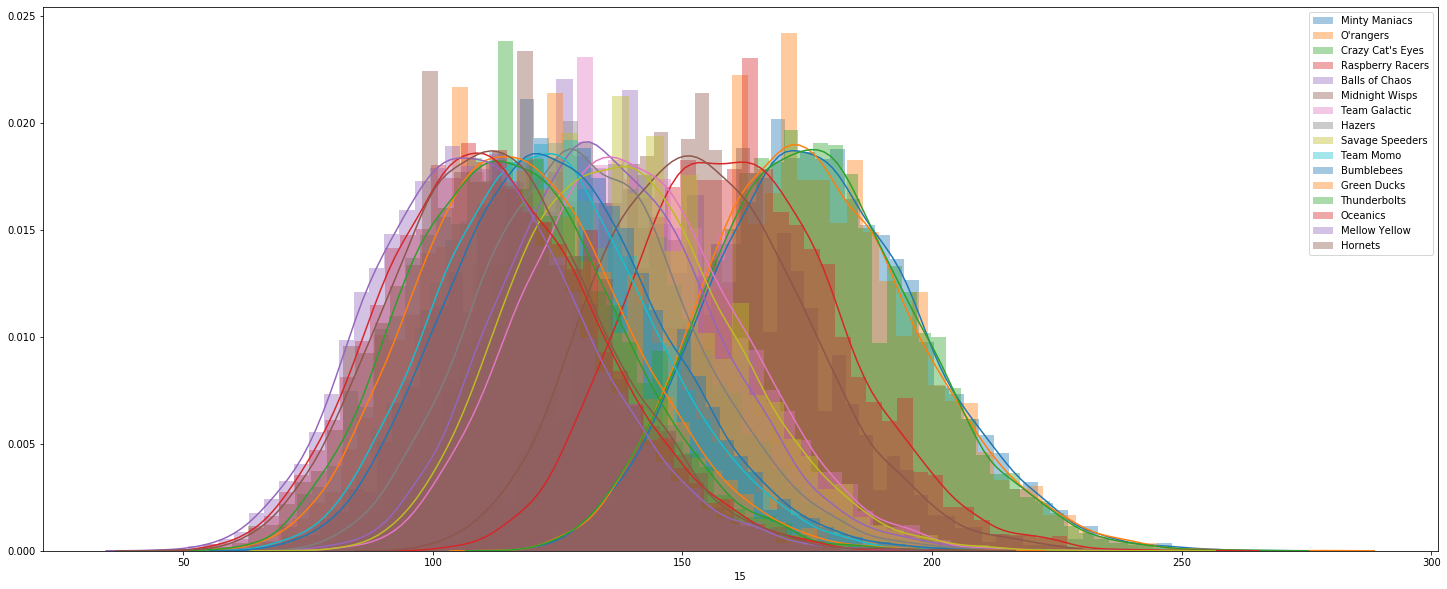

In [84]:
plt.figure(figsize=(25,10))
for idx, row in scores.iterrows():
    # print(row)
    teamName = row.pop("Team")
    print(teamName)
    # plt.figure()
    # plt.title(teamName)
    sns.distplot(row, label = teamName)
plt.legend()
plt.savefig("scores_hist.png")
plt.show()

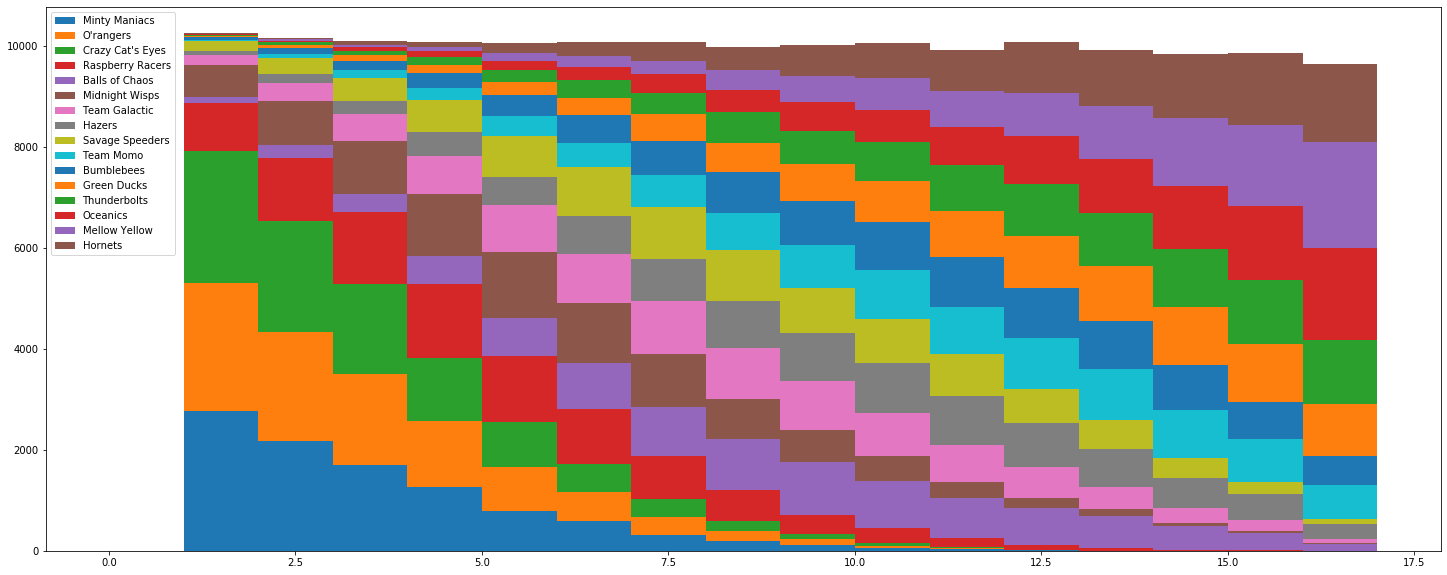

In [95]:
plt.figure(figsize=(25,10))
ranksPlot = ranks.copy()
teamNames = ranksPlot.pop("Team")
plt.hist(ranksPlot, histtype = "barstacked", bins = list(range(18)), label = teamNames)
plt.legend()
plt.savefig("ranks_hist.png")
plt.show()